<a href="https://colab.research.google.com/github/Anuja0810/Anuja0810/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's Grow More - Virtual Intenship Program (LGMVIP)- November 2021

Anuja Sawarkar

Beginner Level Task 1: Iris Flower Classification 
*********************************************************************** 

**Importing Libraries**

First, we’ve imported some necessary packages for the project.

Numpy will be used for any computational operations.
We’ll use Matplotlib and seaborn for data visualization.
Pandas help to load data from various sources like local storage, database, excel file, CSV file, etc.

In [ ]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Loading the data:

Next, we load the data using pd.read_csv() and set the column name as per the iris data information.
Pd.read_csv reads CSV files. CSV stands for comma separated value.
df.head() only shows the first 5 rows from the data set table.

In [ ]:
# Load the data
df = pd.read_csv('/content/drive/MyDrive/IRIS.csv')
columns = ['Sepal length', 'Sepal width', 'Petal length', 'Petal width', 'Class_labels'] 

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


**Analyze and visualize the dataset**

Let’s see some information about the dataset.

In [ ]:
df.shape


(150, 5)

In [ ]:
# Some basic statistical analysis about the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


From this description, we can see all the descriptions about the data, like average length and width, minimum value, maximum value, the 25%, 50%, and 75% distribution value, etc.



In [ ]:
df['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

Let’s visualize the dataset.

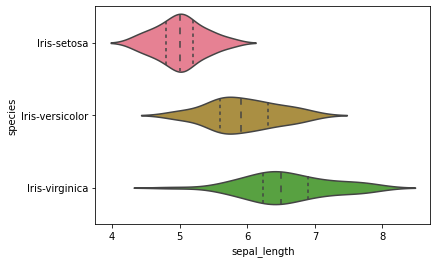

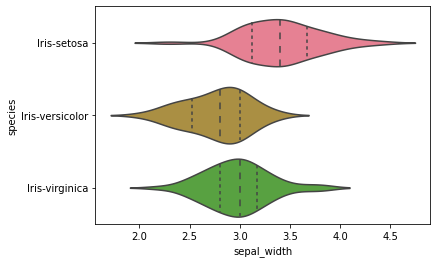

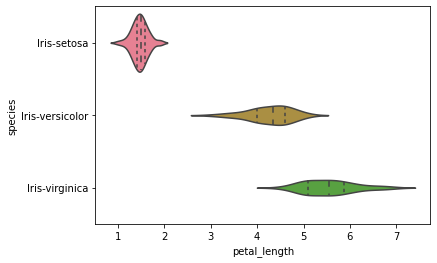

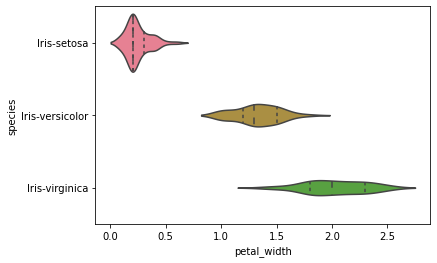

In [ ]:
sns.violinplot(y='species', x='sepal_length', data=df, inner='quartile')
plt.show()
sns.violinplot(y='species', x='sepal_width', data=df, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_length', data=df, inner='quartile')
plt.show()
sns.violinplot(y='species', x='petal_width', data=df, inner='quartile')
plt.show()

**Pair plot**
Plotting multiple pairwise bivariate distributions in a dataset using pairplot:

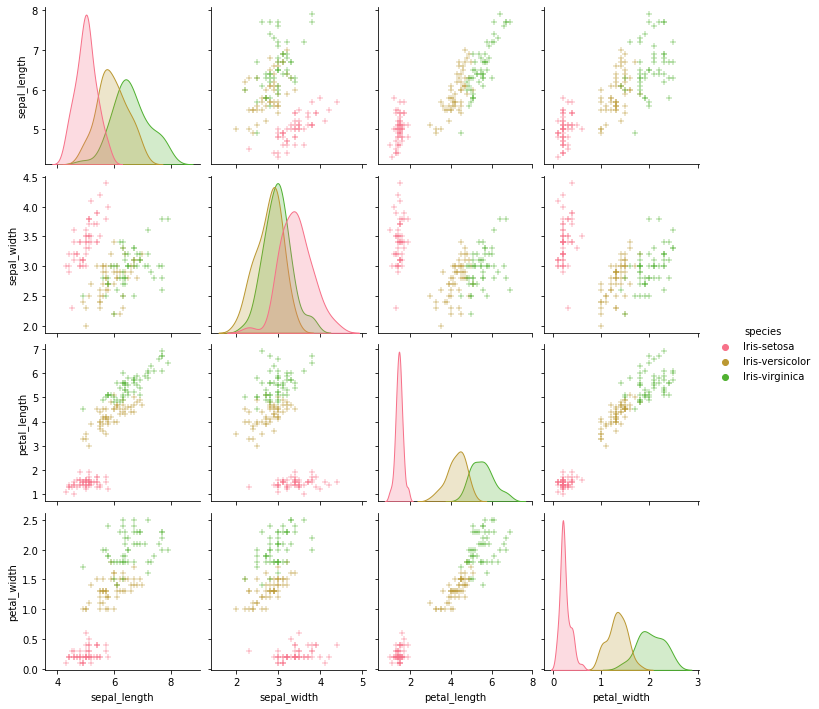

In [ ]:
sns.pairplot(df, hue='species', markers='+')
plt.show()

**Heatmap**
Plotting the heatmap to check the correlation.
dataset.corr() is used to find the pairwise correlation of all columns in the dataframe.

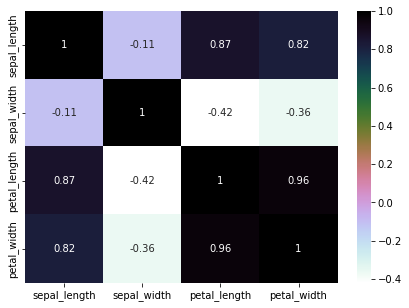

In [ ]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')
plt.show()

***Model Building- part 1***


Splitting the dataset
X is having all the dependent variables.
Y is having an independent variable (here in this case ‘class’ is an independent variable).

In [ ]:
X = df.drop(['species'], axis=1)
y = df['species']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (150, 4) | y shape: (150,) 


***Train Test split***


Splitting our dataset into train and test using train_test_split(), what we are doing here is taking 80% of data to train our model, and 20% that we will hold back as a validation dataset:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

 After that fitting/training the model on X_train and Y_train using .fit() method.
 Then we are predicting on X_test using .predict() method.

Now checking the accuracy of our model using
accuracy_score(y_test, prediction)
y_test: actual values of X_test
prediction: predicted values of X_test.

 Printing out the classification report using
classification_report(y_test, prediction).

In [ ]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.9666666666666667
Classification Report: 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



In ML, there is no specific model or an algorithm which can give 100% result to every single dataset. We need to understand the data before we apply any algorithm and build our model depending on the desired result. This dataset gives us 100% accuracy, which is nearly impossible. From the above models, RandomForest gives optimal accuracy compared to other algorithms because it works best with continuous data and it also applies a nonlinear relationship to the features. By using a this algorithm, you reduce the chances of overfitting and the variance in the data which thus leads to better accuracy.